
# Оцінка та вдосконалення моделі


<h2>Мета</h2>

Ознайомитись з методами оцінки та вдосконалення регресійних моделей. Після завершення цієї лабораторної роботи ви зможете:

* Розділяти дані на навчальну та тестову вибірки
* Використовувати перехресну перевірку для оцінки якості моделі
* Обирати оптимальну складність моделі для уникнення перенавчання
* Вдосконалювати моделі прогнозування за допомогою підбору параметрів


1. Скачайте дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a> (Data2.csv з виправленими помилками та заповненими пропусками). Запишіть дані у два датафрейми: предиктори (x_data) та відгуки (y_data). Випадковим чином розділіть дані на навчальні та тестові (використайте 20% загального набору в якості тестових даних).
2. Побудуйте модель лінійної одномірної регресії для одного з предикторів, використовуючи навчальні дані. Знайдіть R^2 на навчальних та тестових даних. Чому вони різні і на який з них треба орієнтуватись при виборі моделі?
3. Побудуйте кілька поліноміальних моделей різних ступенів для того ж предиктора. Знайдіть R^2 цих моделей на тестових даних. Яка з моделей краща? При якому ступені полінома спостерігається перенавчання?
4. Побудуйте модель гребеневої регресії для двох найкращих предикторів. Параметр alpha повинен бути встановлений на 10. Обчисліть R^2.
5. Виконайте пошук по сітці для параметра alpha та параметра нормалізації, а потім побудуйте модель, використавши найкращі значення параметрів.

<a name="task1"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Запишіть дані у два датафрейми: предиктори (x_data) та відгуки (y_data). Випадковим чином розділіть дані на навчальні та тестові (використайте 20% загального набору в якості тестових даних).</p>
</div>


Зчитую дані з файлу у датафрейм


In [1]:
import pandas as pd 
path = "clean_data2.csv"
df = pd.read_csv(path)

Буду використовувати тільки числові дані


In [2]:
df=df._get_numeric_data()
df.head()

,GDP per capita,Population,CO2 emission,Area,Population density
0,561.778746,34656032.0,9809.225000,652860,53.083405
1,4124.982390,2876101.0,5716.853000,28750,100.038296
2,3916.881571,40606052.0,145400.217000,2381740,17.048902
3,11834.745230,55599.0,165114.116337,200,277.995000
4,36988.622030,77281.0,462.042000,470,164.427660


Записую дані у два датафрейми: предиктори (x_data) та відгуки (y_data).


In [3]:
y_data = df['CO2 emission']
x_data=df.drop('CO2 emission',axis=1)

Випадковим чином розділяю дані на навчальні та тестові (40% загального набору в якості тестових даних).


In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=0)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 87
number of training samples: 130


<a name="task2"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Побудуйте модель лінійної одномірної регресії для одного з предикторів, використовуючи навчальні дані. Знайдіть R^2 на навчальних та тестових даних. Чому вони різні і на який з них треба орієнтуватись при виборі моделі?</p>
</div>


<p>З попередніх робіт знаю, що хорошими показниками для 'CO2 emission' можуть бути:</p>
<ul>
    <li>Area</li>
    <li>Population</li>
</ul>
При цьому одномірна модель для ознаки 'Population' була кращою. Тому будуватиму моделі, використовуючи саме цю ознаку як предиктор.

<p>Створюю об’єкт лінійної регресії та навчаю модель</p>


In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train[['Population']],y_train)

LinearRegression()

Обчислюю R^2  на навчальних та тестових даних:


In [6]:
print("Test data: ", lr.score(x_test[['Population']], y_test))
print("Train data: ", lr.score(x_train[['Population']],y_train))

Test data:  -0.5104728841567661
Train data:  0.6594132390523071


<p>Вони різні бо R^2 набагато менший, якщо обчислюємо його на тестових, а не навчальних даних.  </p>
<p>При виборі моделі треба орієнтуватись на модель з більшим R^2.</p>


<a name="task3"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Побудуйте кілька поліноміальних моделей різних ступенів для того ж предиктора. Знайдіть R^2 цих моделей на тестових даних. Яка з моделей краща? При якому ступені полінома спостерігається перенавчання?</p>
</div>


Будую поліноміальну модель 2 ступеня, на тестових даних обчислюю R^2


In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
# Виконую поліноміальне перетворення 2 ступеня для ознаки 'Population'
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)
pr_order2 = PolynomialFeatures(degree=2)
x_train_pr = pr_order2.fit_transform(x_train[['Population']])
x_test_pr = pr_order2.fit_transform(x_test[['Population']])

# Будую поліноміальну модель
poly_order2 = LinearRegression()
poly_order2.fit(x_train_pr, y_train)

# На тестових даних обчислюю R^2
poly_order2.score(x_test_pr, y_test)

0.5211384299071616

Будую поліноміальну модель 3 ступеня, на тестових даних обчислюю R^2


In [12]:
# Виконую поліноміальне перетворення 3 ступеня для ознаки 'Population'
pr_order3 = PolynomialFeatures(degree=3)
x_train_pr = pr_order3.fit_transform(x_train[['Population']])
x_test_pr = pr_order3.fit_transform(x_test[['Population']])

# Будую поліноміальну модель
poly_order3 = LinearRegression()
poly_order3.fit(x_train_pr, y_train)

# На тестових даних обчислюю R^2
poly_order3.score(x_test_pr, y_test)

0.23057278510951718

Будую поліноміальну модель 4 ступеня, на тестових даних обчислюю R^2


In [13]:
# Виконую поліноміальне перетворення 4 ступеня для ознаки 'Population'
pr_order4 = PolynomialFeatures(degree=4)
x_train_pr = pr_order4.fit_transform(x_train[['Population']])
x_test_pr = pr_order4.fit_transform(x_test[['Population']])

# Будую поліноміальну модель
poly_order4 = LinearRegression()
poly_order4.fit(x_train_pr, y_train)

# На тестових даних обчислюю R^2
poly_order4.score(x_test_pr, y_test)

-0.12332512457570788

Найкращою є модель 2 ступеня, бо для 4 ступеня вже спостерігається перенавчання.


<a name="task4"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Побудуйте модель гребеневої регресії для двох найкращих предикторів. Параметр alpha повинен бути встановлений на 10. Обчисліть R^2.</p>
</div>


Будую модель гребеневої регресії, обчислюю R^2


In [14]:
# Виконую поліноміальне перетворення 2 ступеня для двох обраних ознак
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['Population','Area']])
x_test_pr=pr.fit_transform(x_test[['Population','Area']])

In [15]:
from sklearn.linear_model import Ridge

# Створюю об’єкт гребеневої регресії, встановивши параметр alpha=10
RigeModel = Ridge(alpha=10)
RigeModel.fit(x_train_pr, y_train)

C:\Users\oksan\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.50471e-36): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=10)

<a name="task5"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Виконайте пошук по сітці для параметра alpha та параметра нормалізації, а потім побудуйте модель, використавши найкращі значення параметрів.</p>
</div>


Створюю словник значень параметрів:


In [16]:
from sklearn.model_selection import GridSearchCV
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 1000000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]

Створюю об’єкт сітки пошуку параметра гребеневої регресії:


In [17]:
RR=Ridge()
RR
Grid1 = GridSearchCV(RR, parameters1, cv=4)

Підбираю модель:


In [18]:
Grid1.fit(x_data[['Population','Area']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000]}])

Отримую модель з найкращими параметрами:


In [19]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=1000000)

Тестую модель на тестових даних (обчислюю R^2):


In [20]:
BestRR.score(x_test[['Population','Area']], y_test)

0.35069438211259285

<a name="task6"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Побудуйте візуалізації для оцінки якості моделей (лінійної, кращої з поліноміальних та кращої з гребеневих)</p>
</div>


Використаю метод "predict", щоб спрогнозувати результати, а потім скористаюсь функцією "DistributionPlot", щоб відобразити розподіл прогнозованих результатів для тестових даних порівняно з фактичними для тестових даних.


C:\Users\oksan\AppData\Local\Temp\ipykernel_19296\3305812936.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\oksan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\oksan\AppData\Local\Temp\ipykernel_19296\3305812936.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `disp

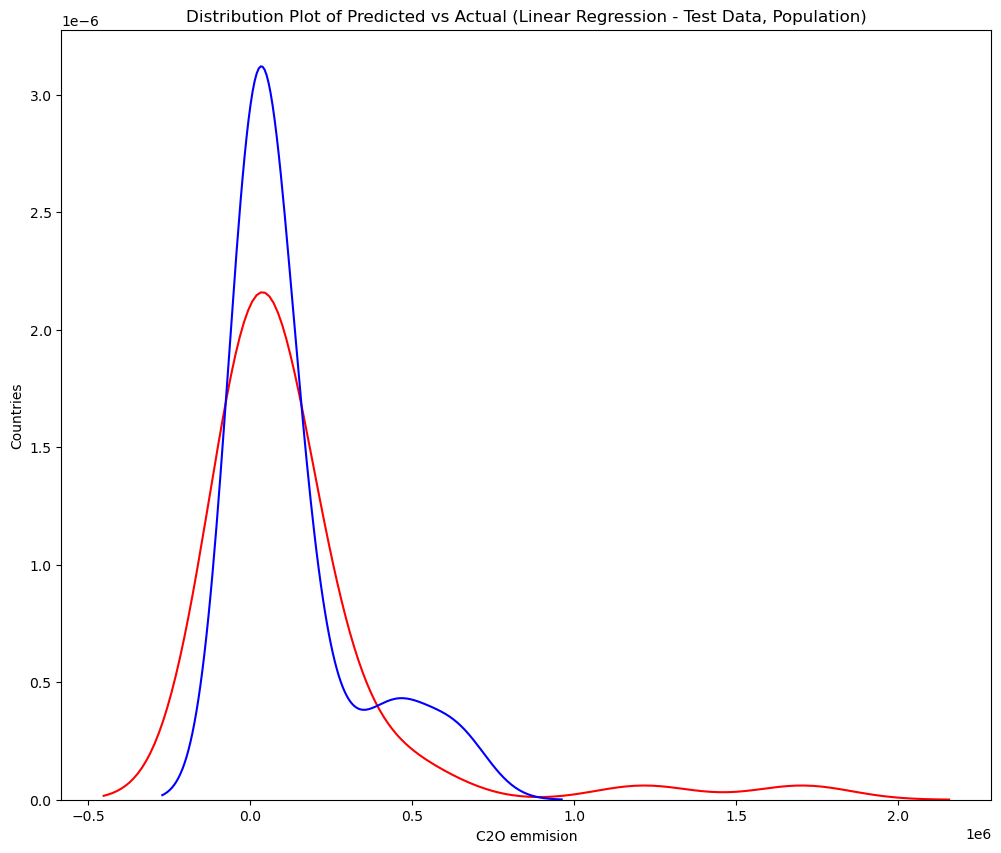

C:\Users\oksan\AppData\Local\Temp\ipykernel_19296\3305812936.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\oksan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\oksan\AppData\Local\Temp\ipykernel_19296\3305812936.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `disp

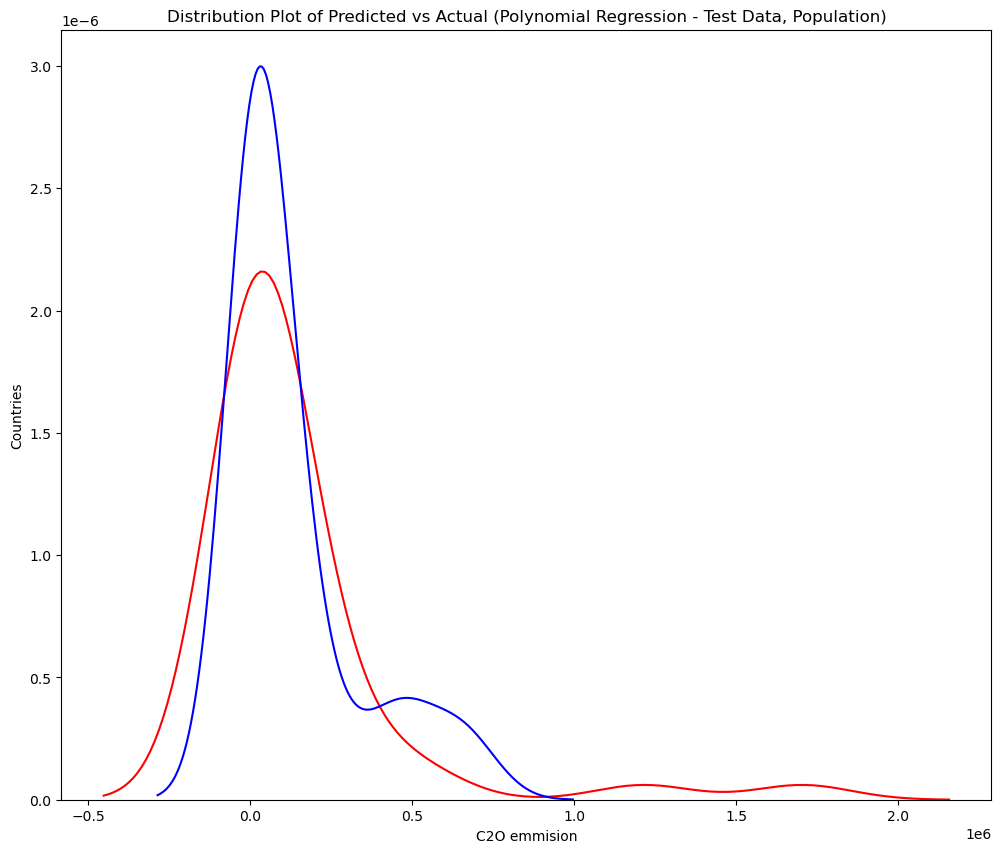

C:\Users\oksan\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.51216e-36): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\oksan\AppData\Local\Temp\ipykernel_19296\3305812936.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\oksan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context(

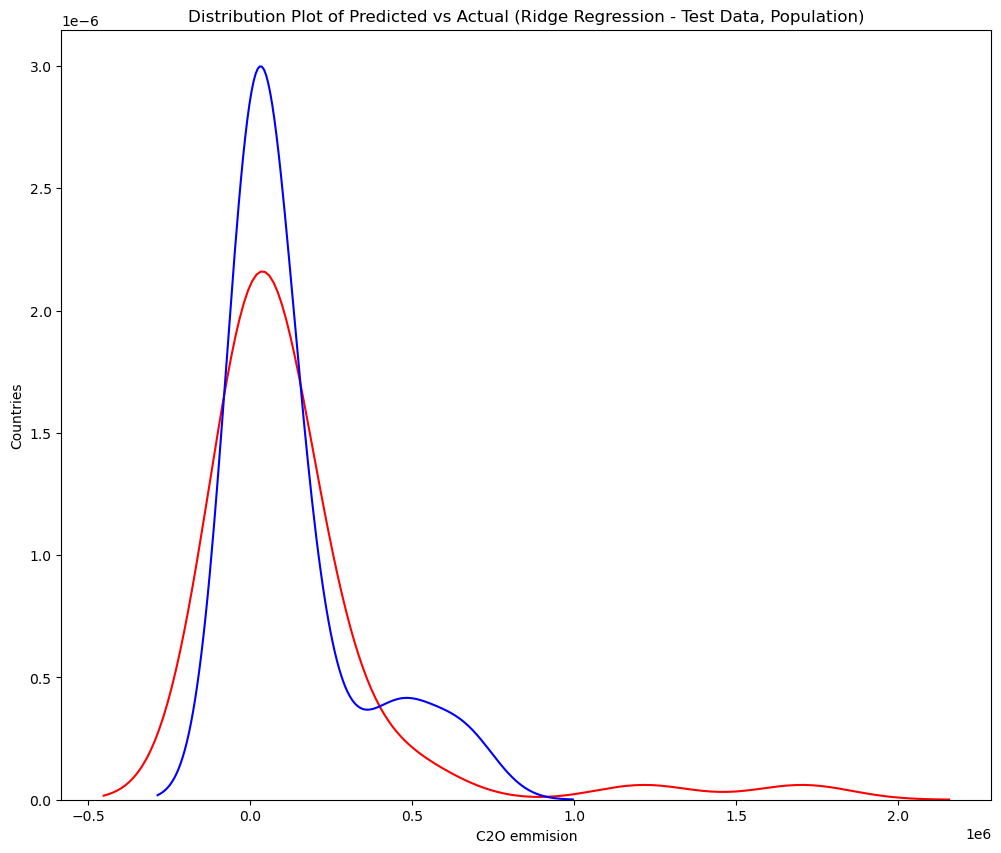

In [21]:
from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('C2O emmision')
    plt.ylabel('Countries')

    plt.show()
    plt.close()

# Лінійна регресія 
lr_population = LinearRegression()
lr_population.fit(x_train[['Population']], y_train)

yhat_test_lr_population = lr_population.predict(x_test[['Population']])

Title = 'Distribution Plot of Predicted vs Actual (Linear Regression - Test Data, Population)'
DistributionPlot(y_test, yhat_test_lr_population, "Actual Values (Test)", "Predicted Values (Test)", Title)

# Поліноміальна регресія
degree = 2
pr = PolynomialFeatures(degree=degree)
x_train_pr = pr.fit_transform(x_train[['Population']])
x_test_pr = pr.fit_transform(x_test[['Population']])

lr_poly = LinearRegression()
lr_poly.fit(x_train_pr, y_train)

yhat_test_poly = lr_poly.predict(x_test_pr)

Title = 'Distribution Plot of Predicted vs Actual (Polynomial Regression - Test Data, Population)'
DistributionPlot(y_test, yhat_test_poly, "Actual Values (Test)", "Predicted Values (Test)", Title)

# Гребенева регресія
alpha = 10  
ridge = Ridge(alpha=alpha)
ridge.fit(x_train_pr, y_train)

yhat_test_ridge = ridge.predict(x_test_pr)

Title = 'Distribution Plot of Predicted vs Actual (Ridge Regression - Test Data, Population)'
DistributionPlot(y_test, yhat_test_ridge, "Actual Values (Test)", "Predicted Values (Test)", Title)


<h2>Виконала студентка групи ІП-21 <br> Гордич Оксана</h2>
